In [1]:
# LSTM for international airline passengers problem with regression framing
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

Using TensorFlow backend.


In [2]:
# fix random seed for reproducibility
numpy.random.seed(7)

In [37]:
# load the dataset
dataframe = pandas.read_csv('monthly-milk-production-pounds-p.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')
print(dataset)

[[ 589.]
 [ 561.]
 [ 640.]
 [ 656.]
 [ 727.]
 [ 697.]
 [ 640.]
 [ 599.]
 [ 568.]
 [ 577.]
 [ 553.]
 [ 582.]
 [ 600.]
 [ 566.]
 [ 653.]
 [ 673.]
 [ 742.]
 [ 716.]
 [ 660.]
 [ 617.]
 [ 583.]
 [ 587.]
 [ 565.]
 [ 598.]
 [ 628.]
 [ 618.]
 [ 688.]
 [ 705.]
 [ 770.]
 [ 736.]
 [ 678.]
 [ 639.]
 [ 604.]
 [ 611.]
 [ 594.]
 [ 634.]
 [ 658.]
 [ 622.]
 [ 709.]
 [ 722.]
 [ 782.]
 [ 756.]
 [ 702.]
 [ 653.]
 [ 615.]
 [ 621.]
 [ 602.]
 [ 635.]
 [ 677.]
 [ 635.]
 [ 736.]
 [ 755.]
 [ 811.]
 [ 798.]
 [ 735.]
 [ 697.]
 [ 661.]
 [ 667.]
 [ 645.]
 [ 688.]
 [ 713.]
 [ 667.]
 [ 762.]
 [ 784.]
 [ 837.]
 [ 817.]
 [ 767.]
 [ 722.]
 [ 681.]
 [ 687.]
 [ 660.]
 [ 698.]
 [ 717.]
 [ 696.]
 [ 775.]
 [ 796.]
 [ 858.]
 [ 826.]
 [ 783.]
 [ 740.]
 [ 701.]
 [ 706.]
 [ 677.]
 [ 711.]
 [ 734.]
 [ 690.]
 [ 785.]
 [ 805.]
 [ 871.]
 [ 845.]
 [ 801.]
 [ 764.]
 [ 725.]
 [ 723.]
 [ 690.]
 [ 734.]
 [ 750.]
 [ 707.]
 [ 807.]
 [ 824.]
 [ 886.]
 [ 859.]
 [ 819.]
 [ 783.]
 [ 740.]
 [ 747.]
 [ 711.]
 [ 751.]
 [ 804.]
 [ 756.]
 [ 860.]
 

In [4]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
print(dataset)

[[ 0.08653843]
 [ 0.01923072]
 [ 0.20913458]
 [ 0.24759614]
 [ 0.41826928]
 [ 0.34615386]
 [ 0.20913458]
 [ 0.11057687]
 [ 0.03605771]
 [ 0.05769229]
 [ 0.        ]
 [ 0.06971157]
 [ 0.11298072]
 [ 0.03125   ]
 [ 0.24038458]
 [ 0.28846157]
 [ 0.45432687]
 [ 0.39182687]
 [ 0.25721157]
 [ 0.15384614]
 [ 0.07211542]
 [ 0.08173072]
 [ 0.02884614]
 [ 0.10817301]
 [ 0.18028843]
 [ 0.15625   ]
 [ 0.32451928]
 [ 0.36538458]
 [ 0.52163458]
 [ 0.43990386]
 [ 0.30048072]
 [ 0.20673072]
 [ 0.12259614]
 [ 0.13942301]
 [ 0.09855771]
 [ 0.19471157]
 [ 0.25240386]
 [ 0.16586542]
 [ 0.375     ]
 [ 0.40625   ]
 [ 0.55048072]
 [ 0.48798072]
 [ 0.35817313]
 [ 0.24038458]
 [ 0.14903843]
 [ 0.16346157]
 [ 0.11778843]
 [ 0.19711542]
 [ 0.29807687]
 [ 0.19711542]
 [ 0.43990386]
 [ 0.48557687]
 [ 0.62019229]
 [ 0.58894229]
 [ 0.4375    ]
 [ 0.34615386]
 [ 0.25961542]
 [ 0.27403843]
 [ 0.22115386]
 [ 0.32451928]
 [ 0.38461542]
 [ 0.27403843]
 [ 0.50240386]
 [ 0.55528843]
 [ 0.68269241]
 [ 0.63461542]
 [ 0.51442

In [5]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
#print(train_size, test_size)
print(len(train), len(test))

112 56


In [6]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [7]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

[ 0.08653843] 0.0192307
[ 0.01923072] 0.209135
[ 0.20913458] 0.247596
[ 0.24759614] 0.418269
[ 0.41826928] 0.346154
[ 0.34615386] 0.209135
[ 0.20913458] 0.110577
[ 0.11057687] 0.0360577
[ 0.03605771] 0.0576923
[ 0.05769229] 0.0
[ 0.] 0.0697116
[ 0.06971157] 0.112981
[ 0.11298072] 0.03125
[ 0.03125] 0.240385
[ 0.24038458] 0.288462
[ 0.28846157] 0.454327
[ 0.45432687] 0.391827
[ 0.39182687] 0.257212
[ 0.25721157] 0.153846
[ 0.15384614] 0.0721154
[ 0.07211542] 0.0817307
[ 0.08173072] 0.0288461
[ 0.02884614] 0.108173
[ 0.10817301] 0.180288
[ 0.18028843] 0.15625
[ 0.15625] 0.324519
[ 0.32451928] 0.365385
[ 0.36538458] 0.521635
[ 0.52163458] 0.439904
[ 0.43990386] 0.300481
[ 0.30048072] 0.206731
[ 0.20673072] 0.122596
[ 0.12259614] 0.139423
[ 0.13942301] 0.0985577
[ 0.09855771] 0.194712
[ 0.19471157] 0.252404
[ 0.25240386] 0.165865
[ 0.16586542] 0.375
[ 0.375] 0.40625
[ 0.40625] 0.550481
[ 0.55048072] 0.487981
[ 0.48798072] 0.358173
[ 0.35817313] 0.240385
[ 0.24038458] 0.149038
[ 0.14903843]

In [19]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
print(trainX.shape[0])
print(testX.shape[0])

110
54


In [9]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
1s - loss: 0.1136
Epoch 2/100
0s - loss: 0.0515
Epoch 3/100
0s - loss: 0.0291
Epoch 4/100
0s - loss: 0.0238
Epoch 5/100
0s - loss: 0.0221
Epoch 6/100
0s - loss: 0.0210
Epoch 7/100
0s - loss: 0.0197
Epoch 8/100
0s - loss: 0.0184
Epoch 9/100
0s - loss: 0.0172
Epoch 10/100
0s - loss: 0.0163
Epoch 11/100
0s - loss: 0.0154
Epoch 12/100
0s - loss: 0.0143
Epoch 13/100
0s - loss: 0.0137
Epoch 14/100
0s - loss: 0.0131
Epoch 15/100
0s - loss: 0.0128
Epoch 16/100
0s - loss: 0.0123
Epoch 17/100
0s - loss: 0.0119
Epoch 18/100
0s - loss: 0.0116
Epoch 19/100
0s - loss: 0.0114
Epoch 20/100
0s - loss: 0.0114
Epoch 21/100
0s - loss: 0.0111
Epoch 22/100
0s - loss: 0.0111
Epoch 23/100
0s - loss: 0.0113
Epoch 24/100
0s - loss: 0.0110
Epoch 25/100
0s - loss: 0.0110
Epoch 26/100
0s - loss: 0.0113
Epoch 27/100
0s - loss: 0.0109
Epoch 28/100
0s - loss: 0.0109
Epoch 29/100
0s - loss: 0.0109
Epoch 30/100
0s - loss: 0.0111
Epoch 31/100
0s - loss: 0.0110
Epoch 32/100
0s - loss: 0.0109
Epoch 33/100
0s -

In [10]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [11]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 43.50 RMSE
Test Score: 44.74 RMSE


In [30]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
print(len(trainPredictPlot))
#trainPredictPlot - delka = 168 (110 hodnot a 58 nan hodnot)

168


In [31]:
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
print(len(trainPredict)+(look_back*2)+1)
print(len(dataset)-1)

113
167


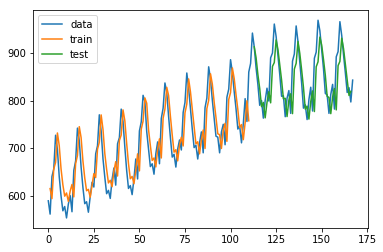

In [34]:
# plot baseline and predictions
data, = plt.plot(scaler.inverse_transform(dataset), label='data')
train, = plt.plot(trainPredictPlot, label='train') #oranzova
test, = plt.plot(testPredictPlot, label='test') #zelena
plt.legend(handles=[data, train, test])
plt.show()